In [15]:
import numpy as np
from numpy import array
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [16]:
# KF assimilation
def assimilate(y_t, H_t, mu, Sigma, Sigma_y_t):
    # Predict y to measure innovation
    y_hat = H_t @ mu 
    # Calculate Kalman gain
    K = Sigma @ H_t.T @ inv(H_t@Sigma@H_t.T + Sigma_y_t)
    # Update belief
    I = np.identity(mu.size)
    mu = mu + K @ (y_t - y_hat)
    Sigma = (I-K@H_t)@Sigma
    #print(mu)
    #print(Sigma)
    return mu, Sigma

In [17]:
# Create time-dynamics
dt = 1
v = 2
M = array([[1,dt],
      [0,1]])
# Create dynamics
def timeDynamics(x, M):
    return M @ x

def propagatePriorInTime(mu, Sigma, M):
    return M @ mu, M @ Sigma @ M.T

In [18]:
# Create observations
Sigma_y = array([
    [50,0],
    [0,1]
])
T = 30
x_truth = [array([[50],[2]])]
for t in range(1,T):
    x_truth.append(timeDynamics(x_truth[t-1], M))
x_obs = [xt + np.random.multivariate_normal([0,0], Sigma_y, 1).T for xt in x_truth]

In [19]:
# Create initial prior
mu = array([[3],
                [4]])
Sigma = array([
    [50,0],
    [0,50]
])

In [20]:
# Assimilate over time
time = np.linspace(1,T,T)
pos_truth = [o[0] for o in x_truth]
pos_obs = [obs[0] for obs in x_obs]
# observations linear in state
H = array([
    [1,0]
])
mu_prior = []
mu_posterior = []

for t in range(T):
    mu_prior.append(mu[0])
    # assimilation step
    mu, Sigma = assimilate(pos_obs[t], H, mu, Sigma, Sigma_y[0,0])
    mu_posterior.append(mu[0])
    # time dynamics for next iteration
    mu, Sigma = propagatePriorInTime(mu, Sigma, M)

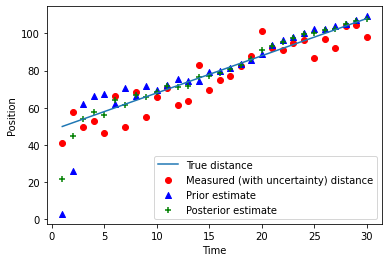

In [21]:
# Inspect
plot1 = plt.figure(1)
plt.plot(time, pos_truth)
plt.scatter(time, pos_obs, color="red")
plt.ylabel('Position')
plt.xlabel('Time')
plt.scatter(time, mu_prior, color="blue", marker="^")
plt.scatter(time, mu_posterior, color="green", marker="+")
plt.legend(['True distance', 
            'Measured (with uncertainty) distance', 
            'Prior estimate',
            'Posterior estimate'])